Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Subhangi"
COLLABORATORS = "Harish , Niraj, vikash"

---

In [2]:
def test():
    pass

# Create as many cells as you need BELOW this cell

# Importing Libraries

In [2]:
import sqlite3
from sqlite3 import Error
import os
from matplotlib import pyplot as plt
from scipy.stats.stats import pearsonr
import random
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import confusion_matrix, accuracy_score
import statistics

#  Functions

In [3]:
def create_connection(db_file, delete_db=False):
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute('PRAGMA foreign_keys = 1')
    except Error as e:
        print(e)

    return conn
        
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)
    cols = [i[0] for i in cur.description]
    rows = cur.fetchall()

    return cols, rows


def prepare_data(columns, data):
    dict_ = dict()
    
    for i, col in enumerate(columns):
        list_ = [_[i] for _ in data]
        dict_[col] = list_
        
    return dict_
        

# Functions for Creating Tables and Data Insertion

In [ ]:
# Create Tables
def create_days_query():
    return ''' CREATE TABLE [Days] (
    [instant] INTEGER NOT NULL PRIMARY KEY,
    [dteday] NVARCHAR(50) NULL,
    [season] INTEGER NULL,
    [yr] INTEGER NULL,
    [mnth] INTEGER NULL,
    [hr] INTEGER NULL,
    [holiday] INTEGER NULL,
    [weekday] INTEGER NULL,
    [workingday] INTEGER NULL
); '''


def create_weather_query():
    return ''' CREATE TABLE [Weather] (
    [instant] INTEGER NOT NULL PRIMARY KEY,
    [weathersit] INTEGER NULL,
    [temp] FLOAT NULL,
    [atemp] FLOAT NULL,
    [hum] FLOAT NULL,
    [windspeed] FLOAT NULL,
    FOREIGN KEY(instant) REFERENCES Days(instant)
); '''


def create_rental_query():
    return ''' CREATE TABLE [Rentals] (
    [instant] INTEGER NOT NULL PRIMARY KEY,
    [casual] INTEGER NULL,
    [registered] INTEGER NULL,
    [cnt] INTEGER NULL,
    FOREIGN KEY(instant) REFERENCES Days(instant)
); '''


# Insert into tables
def insert_days(conn, values):
    cur = conn.cursor()
    conn.executemany(''' INSERT INTO Days(instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday)
    VALUES(?,?,?,?,?,?,?,?,?) ''', values)
    return cur.lastrowid


def insert_weather(conn, values):
    cur = conn.cursor()
    conn.executemany(''' INSERT INTO Weather(instant, weathersit, temp, atemp, hum, windspeed)
    VALUES(?,?,?,?,?,?) ''', values)
    return cur.lastrowid


def insert_rental(conn, values):
    cur = conn.cursor()
    conn.executemany(''' INSERT INTO Rentals(instant, casual, registered, cnt) VALUES(?,?,?,?) ''', values)
    return cur.lastrowid


# Read Data from csv into list

In [ ]:
data_ = list()
with open('Train.csv', 'r') as file:
    my_reader = csv.reader(file, delimiter=',')
    for row in my_reader:
        data_.append(tuple(row))
        
header = data_[0]
data_ = data_[1:]

# DB Creation, Table Generation and Data Insertion *

In [ ]:
days_ = [tuple([int(_[0]), _[1], int(_[2]), int(_[3]), int(_[4]), int(_[5]), int(_[6]), int(_[7]), int(_[8])]) for _ in data_]
weather_ = [tuple([int(_[0]), int(_[9]), float(_[10]), float(_[11]), float(_[12]), float(_[13])]) for _ in data_]
rentals_ = [tuple([int(_[0]), int(_[14]), int(_[15]), int(_[16])]) for _ in data_]

conn = create_connection('bike_rentals.db', delete_db=True)

with conn:
    create_table(conn, create_days_query())
    create_table(conn, create_weather_query())
    create_table(conn, create_rental_query())

    insert_days(conn, days_)
    insert_weather(conn, weather_)
    insert_rental(conn, rentals_)


# NUMBER OF TABLES IN DATABASE

In [4]:
conn = create_connection('bike_rentals.db', delete_db=False) #Create Connection
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
tablenames = [i[0] for i in cur.fetchall()]
tablenames    # 3 Tables

['Days', 'Weather', 'Rentals']

#  Insights

# Average count of hours per month (1- 12)

Text(0, 0.5, 'Average Rentals')

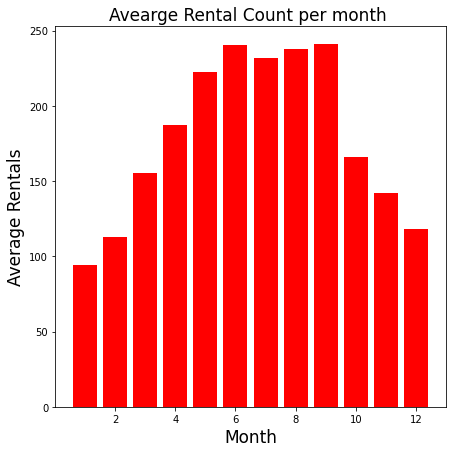

In [5]:
# Average hourly count per month
q = ''' select a.mnth, round(avg(cnt), 2) as average_hourly_count from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant
group by 1; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary

plt.figure(figsize=(7,7))
plt.bar(data_dict["mnth"],data_dict['average_hourly_count'], color = "r")
plt.title('Avearge Rental Count per month ' ,fontsize=17)
plt.xlabel("Month" , fontsize=17)
plt.ylabel("Average Rentals" , fontsize=17)

# Average hourly count per season

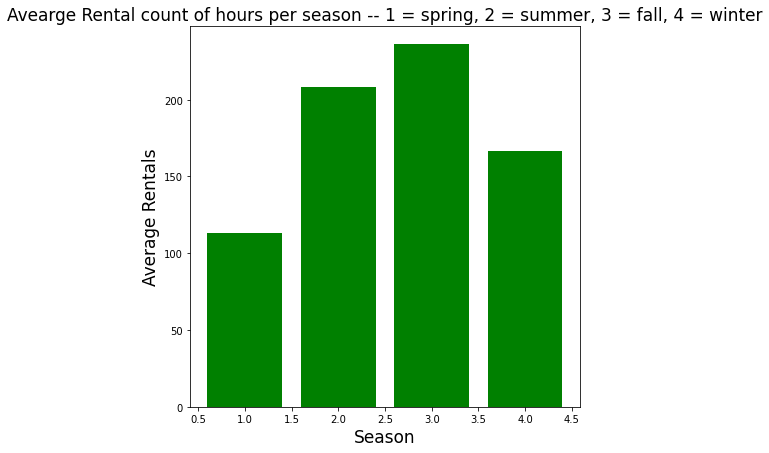

In [6]:
# Average Rental count per season
q = ''' select a.season, round(avg(cnt), 2) as average_hourly_count from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant
group by 1; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary

plt.figure(figsize=(7,7))
plt.bar(data_dict["season"],data_dict['average_hourly_count'], color = "green")
plt.title('Avearge Rental count of hours per season -- 1 = spring, 2 = summer, 3 = fall, 4 = winter' ,fontsize=17)
plt.xlabel("Season" , fontsize=17)
plt.ylabel("Average Rentals" , fontsize=17)
plt.show()

# Average Rental count per hour

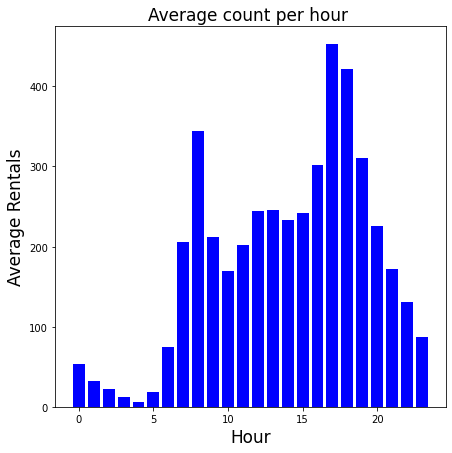

In [7]:
# Average Rental count per hour
q = ''' select a.hr, round(avg(cnt), 2) as average_hourly_count from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant
group by 1; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary

plt.figure(figsize=(7,7))
plt.bar(data_dict["hr"],data_dict['average_hourly_count'],color = "blue")
plt.title('Average count per hour ' , fontsize=17)
plt.xlabel("Hour" , fontsize=17)
plt.ylabel("Average Rentals", fontsize=17)
plt.show()

# Average Rental count on workingday=1

Text(0.5, 1.0, 'Average Rental Counts Distribution for Working days')

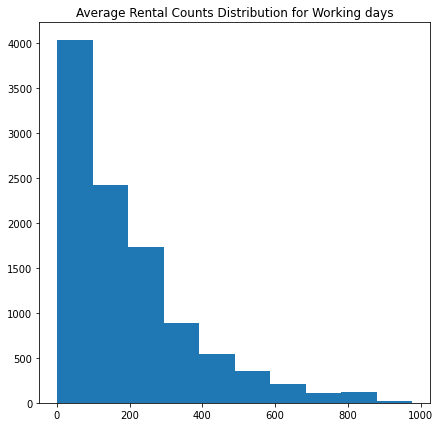

In [8]:
# Average Rental count on workingday=1
q = ''' select cnt from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant
where workingday=1; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary
plt.figure(figsize=(7, 7))
plt.hist(data_dict['cnt']) # Slightly right skewed
plt.title('Average Rental Counts Distribution for Working days')

# Average Rental count on workingday=0

Text(0.5, 1.0, 'Hourly Rental Counts Distribution for Non-working days')

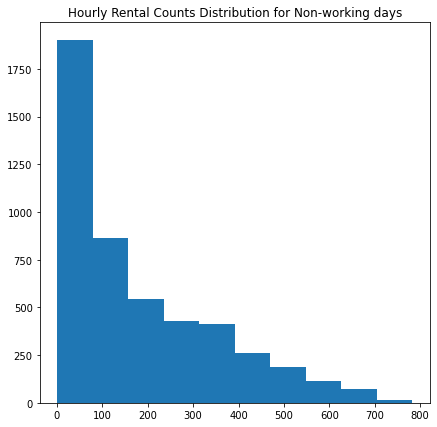

In [9]:
# Average hourly Rental count on workingday=0
q = ''' select cnt from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant
where workingday=0; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary
plt.figure(figsize=(7, 7))
plt.hist(data_dict['cnt']) # Left skewed
plt.title('Hourly Rental Counts Distribution for Non-working days')

# Scatterplot for Temp and Counts

Text(0, 0.5, 'Average Rentals')

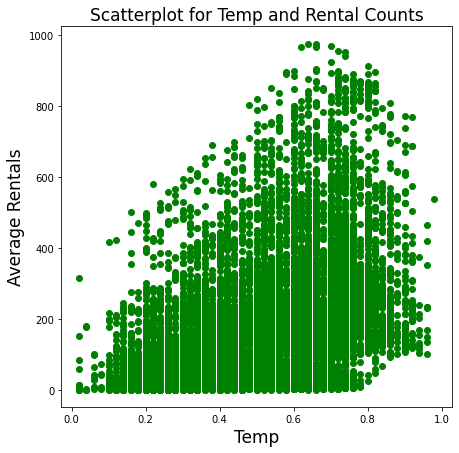

In [10]:
# Scatterplot for Temp and Counts
q = ''' select temp, cnt from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant
where workingday=1; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary
plt.figure(figsize=(7,7))
plt.scatter(data_dict['temp'], data_dict['cnt'] , color = "Green") # Increasing Trend
plt.title("Scatterplot for Temp and Rental Counts",fontsize=17)
plt.xlabel("Temp" , fontsize=17)
plt.ylabel("Average Rentals" , fontsize=17)

# Scatterplot for Humidity and Rental counts 

Text(0, 0.5, 'Average Rentals')

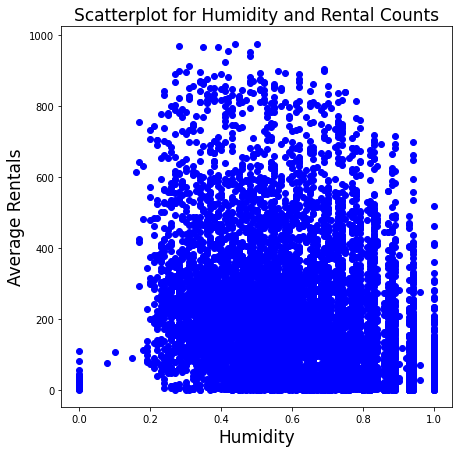

In [11]:
# Scatterplot for Humidity and Rental Counts
q = ''' select hum, cnt from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant
where workingday=1; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary
plt.figure(figsize=(7,7))
plt.scatter(data_dict['hum'], data_dict['cnt'] , color = "blue") # Decreasing Trend
plt.title("Scatterplot for Humidity and Rental Counts" , fontsize=17)
plt.xlabel("Humidity" , fontsize=17)
plt.ylabel("Average Rentals" , fontsize=17)

# Scatterplot for Windspeed and Rental Counts

Text(0, 0.5, 'Average Rentals')

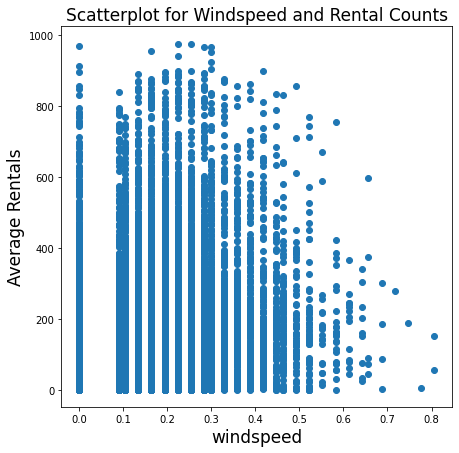

In [12]:
# Scatterplot for Windspeed and Rental Counts
q = ''' select windspeed, cnt from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant
where workingday=1; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary
plt.figure(figsize=(7,7))
plt.scatter(data_dict['windspeed'], data_dict['cnt']) # Decreasing Trend, but not much data towards very high windspeed
plt.title("Scatterplot for Windspeed and Rental Counts",fontsize=17)
plt.xlabel("windspeed", fontsize=17)
plt.ylabel("Average Rentals",fontsize=17)

# Rental Count distribution for weathersit=1 (Clear, Few clouds, Partly cloudy)

Text(0.5, 1.0, 'Rental Counts distribution for weathersit=1')

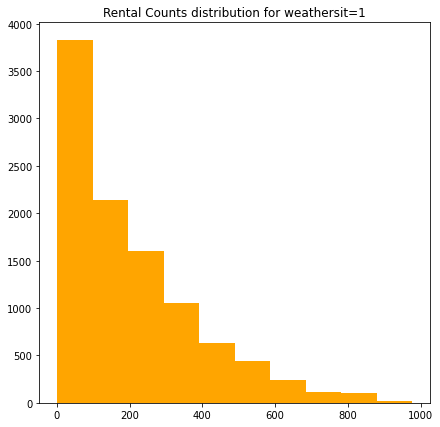

In [13]:
# Rental Counts distribution for weathersit=1
q = ''' select cnt from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant
where weathersit=1; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary
plt.figure(figsize=(7, 7))
plt.hist(data_dict['cnt'] , color = "orange") # Left skewed
plt.title("Rental Counts distribution for weathersit=1")

#  Rental Count distribution for weathersit=2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

Text(0.5, 1.0, 'Rental Counts distribution for weathersit=2')

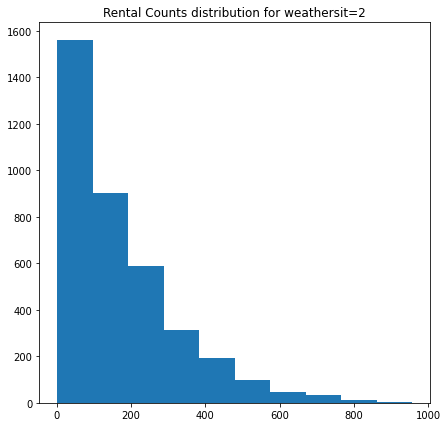

In [14]:
#Rental Count distribution for weathersit=2
q = ''' select cnt from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant
where weathersit=2; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary
plt.figure(figsize=(7, 7))
plt.hist(data_dict['cnt']) # left skewed
plt.title("Rental Counts distribution for weathersit=2")

# Rental Count distribution for weathersit=3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) 

Text(0.5, 1.0, 'Rental Counts distribution for weathersit=3')

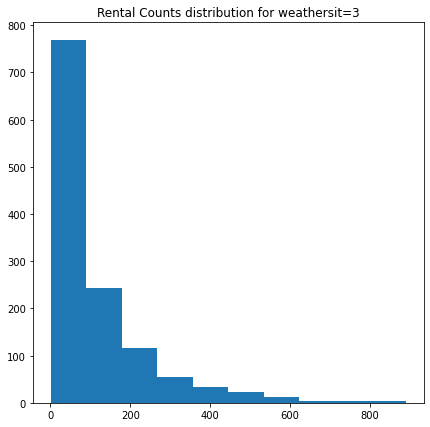

In [15]:
# Rental Counts distribution for weathersit=3
q = ''' select cnt from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant
where weathersit=3; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary
plt.figure(figsize=(7, 7))
plt.hist(data_dict['cnt']) # More Left skewed - due to rain and storm
plt.title("Rental Counts distribution for weathersit=3")

# Rental Count distribution for weathersit=4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

Text(0.5, 1.0, 'Rental Counts distribution for weathersit=4')

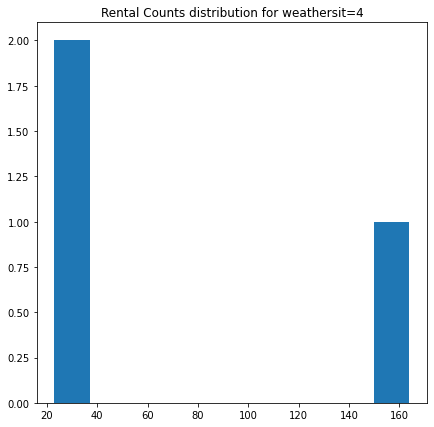

In [16]:
# Rental Counts distribution for weathersit=4
q = ''' select cnt from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant
where weathersit=4; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary
plt.figure(figsize=(7, 7))
plt.hist(data_dict['cnt']) # Not enough data to comment on
plt.title("Rental Counts distribution for weathersit=4")

# Percent of Casual rides for workingday=0

Text(0.5, 1.0, 'Distribution of Casual Rides shares for Non-working days')

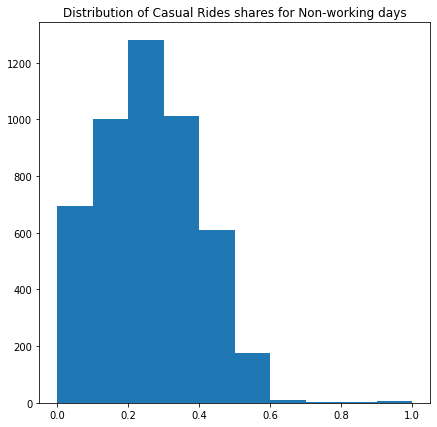

In [17]:
# Percent of Casual rides for workingday=0
q = ''' select round(cast(casual as float)/cast(cnt as float), 2) as percent_casual_rides from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant
where workingday=0; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary
plt.figure(figsize=(7, 7))
plt.hist(data_dict['percent_casual_rides']) # Uniform
plt.title("Distribution of Casual Rides shares for Non-working days")

#  Percent of Casual rides for workingday=1

Text(0.5, 1.0, 'Distribution of Casual Rides shares for Working days')

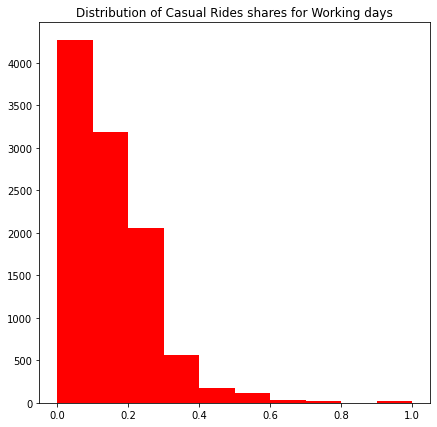

In [18]:
# Percent of Casual rides for workingday=1
q = ''' select round(cast(casual as float)/cast(cnt as float), 2) as percent_casual_rides from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant
where workingday=1; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary
plt.figure(figsize=(7, 7))
plt.hist(data_dict['percent_casual_rides'], color='r') # Left skewed
plt.title("Distribution of Casual Rides shares for Working days")

# Rentals count across Temp buckets 

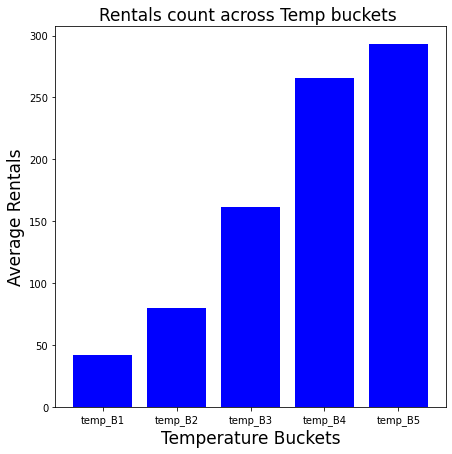

In [19]:
# Rentals count across Temp buckets 
q = ''' select temp_bucket, avg(cnt) as average_hourly_count, count(*) as data_points
from
(select (case when temp<=0.1 then 'temp_B1'
when temp<=0.3 then 'temp_B2'
when temp<=0.6 then 'temp_B3'
when temp<=0.9 then 'temp_B4'
else 'temp_B5' end) as temp_bucket, cnt from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant)
group by 1; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary
plt.figure(figsize=(7, 7))
plt.bar(data_dict['temp_bucket'],data_dict['average_hourly_count'], color= "blue")
plt.title('Rentals count across Temp buckets ', fontsize=17)
plt.xlabel("Temperature Buckets" , fontsize=17)
plt.ylabel("Average Rentals" , fontsize=17)
plt.show()

# Rentals count across ATemp buckets 

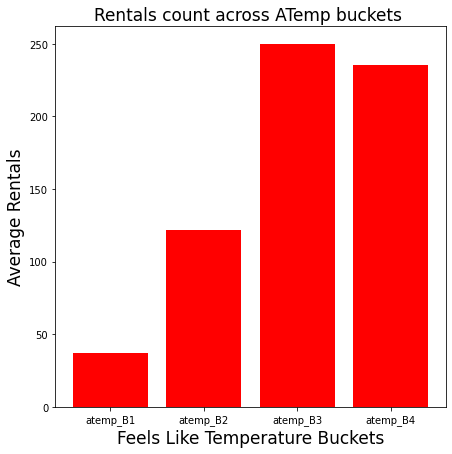

In [20]:
# Rentals count across ATemp buckets
q = ''' select atemp_bucket, avg(cnt) as average_hourly_count, count(*) as data_points
from
(select (case when atemp<=0.1 then 'atemp_B1'
when atemp<=0.5 then 'atemp_B2'
when atemp<=0.9 then 'atemp_B3'
else 'atemp_B4' end) as atemp_bucket, cnt from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant)
group by 1; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary
plt.figure(figsize=(7, 7))
plt.bar(data_dict['atemp_bucket'],data_dict['average_hourly_count'], color="red")
plt.title('Rentals count across ATemp buckets ' , fontsize=17)
plt.xlabel("Feels Like Temperature Buckets" ,fontsize=17)
plt.ylabel("Average Rentals" , fontsize=17)
plt.show()

#  Rentals count across Humidity buckets 

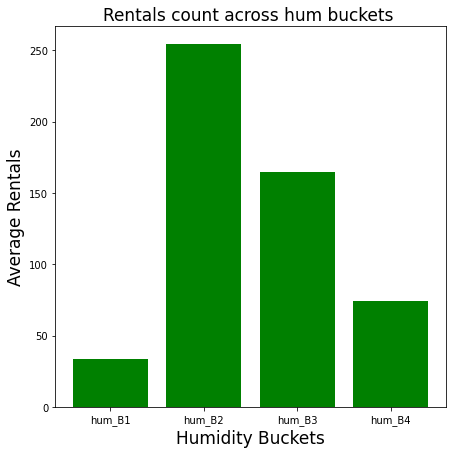

In [21]:
# Rentals count across Humidity buckets 
q = ''' select hum_bucket, avg(cnt) as average_hourly_count, count(*) as data_points
from
(select (case when hum<=0.1 then 'hum_B1'
when hum<=0.5 then 'hum_B2'
when hum<=0.9 then 'hum_B3'
else 'hum_B4' end) as hum_bucket, cnt from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant)
group by 1; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary
plt.figure(figsize=(7, 7))
plt.bar(data_dict['hum_bucket'],data_dict['average_hourly_count'], color="green")
plt.title('Rentals count across hum buckets ' , fontsize=17)
plt.xlabel("Humidity Buckets" , fontsize=17)
plt.ylabel("Average Rentals" , fontsize=17)
plt.show()

# Rentals count across Windspeed buckets

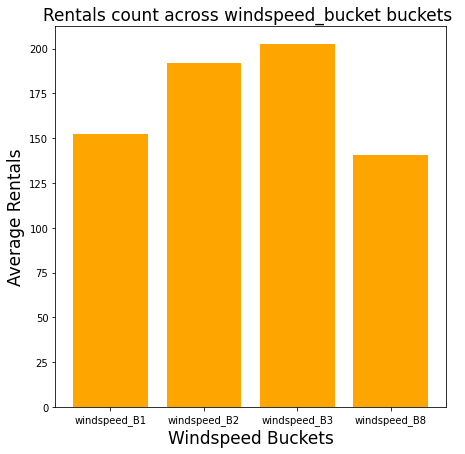

In [22]:
# Rentals count across Windspeed buckets
q = ''' select windspeed_bucket, avg(cnt) as average_hourly_count, count(*) as data_points
from
(select (case when windspeed<=0.1 then 'windspeed_B1'
when windspeed<=0.3 then 'windspeed_B2'
when windspeed<=0.7 then 'windspeed_B3'
else 'windspeed_B8' end) as windspeed_bucket, cnt from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant)
group by 1; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary
plt.figure(figsize=(7, 7))
plt.bar(data_dict['windspeed_bucket'],data_dict['average_hourly_count'], color="orange")
plt.title('Rentals count across windspeed_bucket buckets ', fontsize=17)
plt.xlabel("Windspeed Buckets" , fontsize=17)
plt.ylabel("Average Rentals" , fontsize=17)
plt.show()

# Correlation with continuous weather features

Text(0.5, 1.0, 'Corelation plot')

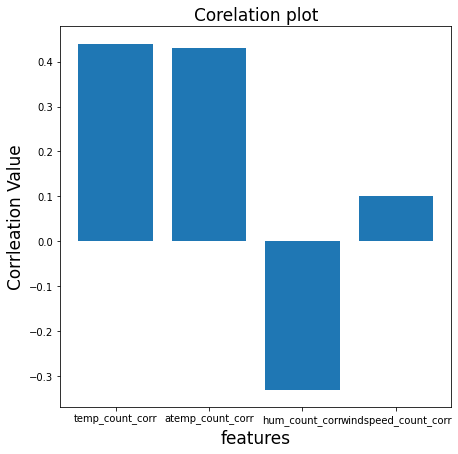

In [23]:
# Correlation with continuous weather features
q = ''' select temp, atemp, hum, windspeed, cnt from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant; '''
header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary

dict_ = dict() #Correlation dict
for f in ['temp', 'atemp', 'hum', 'windspeed']:
    dict_['{}_count_corr'.format(f)] = round(pearsonr(data_dict[f], data_dict['cnt'])[0], 2)

keys = dict_.keys()
values = dict_.values()
plt.figure(figsize=(7,7))
plt.bar(keys, values)
plt.xlabel("features", fontsize=17)
plt.ylabel("Corrleation Value", fontsize=17)
plt.title("Corelation plot", fontsize=17)

# Classification by using Gradient Boosting Algorithm 

In [24]:
q = ''' select a.instant, (case when season=1 then 1 else 0 end) as season_1,
(case when season=2 then 1 else 0 end) as season_2, (case when season=3 then 1 else 0 end) as season_3,

(case when mnth=1 then 1 else 0 end) as mnth_1, (case when mnth=2 then 1 else 0 end) as mnth_2,
(case when mnth=3 then 1 else 0 end) as mnth_3, (case when mnth=4 then 1 else 0 end) as mnth_4,
(case when mnth=5 then 1 else 0 end) as mnth_5,
(case when mnth=6 then 1 else 0 end) as mnth_6, (case when mnth=7 then 1 else 0 end) as mnth_7,
(case when mnth=8 then 1 else 0 end) as mnth_8, (case when mnth=9 then 1 else 0 end) as mnth_9,
(case when mnth=10 then 1 else 0 end) as mnth_10, (case when mnth=11 then 1 else 0 end) as mnth_11,

(case when hr<2 then 1 else 0 end) as hr_0_1, (case when hr<4 then 1 else 0 end) as hr_2_3,
(case when hr<6 then 1 else 0 end) as hr_4_5, (case when hr<8 then 1 else 0 end) as hr_6_7,
(case when hr<10 then 1 else 0 end) as hr_8_9, (case when hr<12 then 1 else 0 end) as hr_10_11,
(case when hr<14 then 1 else 0 end) as hr_12_13, (case when hr<16 then 1 else 0 end) as hr_14_15,
(case when hr<18 then 1 else 0 end) as hr_16_17, (case when hr<20 then 1 else 0 end) as hr_18_19,
(case when hr<22 then 1 else 0 end) as hr_20_21,

(case when weekday=0 then 1 else 0 end) as weekday_0, (case when weekday=1 then 1 else 0 end) as weekday_1,
(case when weekday=2 then 1 else 0 end) as weekday_2, (case when weekday=3 then 1 else 0 end) as weekday_3,
(case when weekday=4 then 1 else 0 end) as weekday_4, (case when weekday=5 then 1 else 0 end) as weekday_5,

(case when weathersit=1 then 1 else 0 end) as weathersit_1, (case when weathersit=2 then 1 else 0 end) as weathersit_2,
(case when weathersit=3 then 1 else 0 end) as weathersit_3, temp, atemp, hum, windspeed, cnt

from
Days a
join Weather b on b.instant=a.instant
join Rentals c on c.instant=a.instant; '''

header, data = execute_sql_statement(q, conn) #Fetch data into list
data_dict = prepare_data(header, data) #Prepare data dictionary


def create_tag(instants, test_instants):
    tag_list = list()
    for _ in instants:
        if _ in test_instants:
            tag_list.append('test')
        else:
            tag_list.append('train')
    
    return tag_list


instants = [_[0] for _ in data]
random.Random(4).shuffle(instants)
test_instants = instants[1:len(instants)+1:4]

tag_list = create_tag(data_dict['instant'], test_instants)

for _, __ in enumerate(data):
    data[_] = list(__)+[tag_list[_]]
    
data_train = [_ for _ in data if _[-1] == 'train']
data_test = [_ for _ in data if _[-1] == 'test']

x_train = [_[1:-2] for _ in data_train]
x_test = [_[1:-2] for _ in data_test]

y_train = [_[-2] for _ in data_train]
y_test = [_[-2] for _ in data_test]

median_ = statistics.median(y_train)
y_train = ['high' if _ >= median_ else 'low' for _ in y_train]
y_test = ['high' if _ >= median_ else 'low' for _ in y_test]

# XGBClassifier
model_ = GBC(learning_rate=0.05, max_depth=6)
model_.fit(x_train, y_train)

# Train Confusion Matrix
print('--------- Train data Confusion Matrix ---------')
print(confusion_matrix(y_train, list(model_.predict(x_train))))
# Test Confusion Matrix
print('--------- Test data Confusion Matrix ---------')
print(confusion_matrix(y_test, list(model_.predict(x_test))))
# Train Accuracy
print('--------- Train Accuracy ---------')
print(round(accuracy_score(y_train, list(model_.predict(x_train))), 2))
# Test Accuracy
print('--------- Test Accuracy ---------')
print(round(accuracy_score(y_test, list(model_.predict(x_test))), 2))
# Feature Importances
features_ = header[1:-1]
importances = list(model_.feature_importances_)
importances = [round((_*100)/sum(importances), 2) for _ in importances]

--------- Train data Confusion Matrix ---------
[[5345  369]
 [ 649 5038]]
--------- Test data Confusion Matrix ---------
[[1732  182]
 [ 277 1610]]
--------- Train Accuracy ---------
0.91
--------- Test Accuracy ---------
0.88


# Feature Importance plot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  import sys


Text(0.5, 1.0, 'Five most important features')

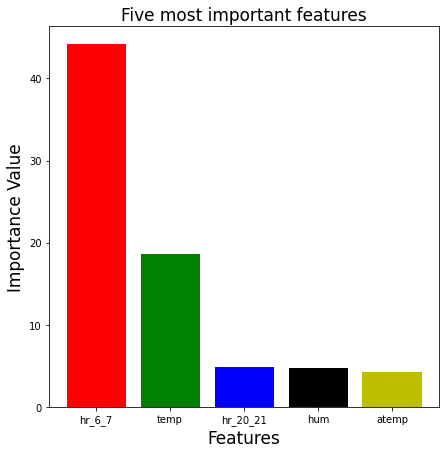

In [25]:
imp_dict = dict(zip(importances, list(range(len(importances)))))
importances.sort(reverse=True)
importances = importances[:5]
my_colors = 'rgbkymc' 
header = [features_[imp_dict[_]] for _ in importances]
plt.figure(figsize=(7,7))
plt.bar(header, importances, align='center' , color= my_colors )
plt.xlabel("Features" , fontsize=17)
plt.ylabel("Importance Value" , fontsize=17)
plt.title("Five most important features" , fontsize=17)